[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


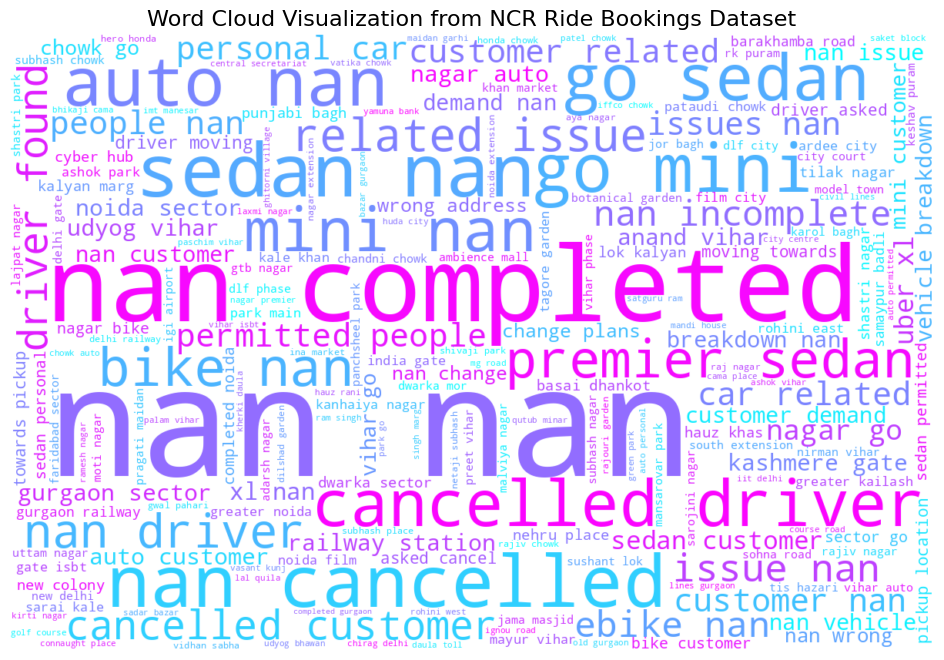

In [ ]:
                                                                             # Install required packages
# !pip install pandas matplotlib wordcloud nltk

import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Load your dataset
file_path = "ncr_ride_bookings.csv"  # Make sure it's in the same folder
data = pd.read_csv(file_path)

# Select text columns for analysis
text_columns = [
    'Booking Status',
    'Pickup Location',
    'Drop Location',
    'Vehicle Type',
    'Driver Cancellation Reason',
    'Incomplete Rides Reason',
    'Reason for cancelling by Customer'
]

# Combine all text columns into a single text corpus
text_data = data[text_columns].astype(str).apply(lambda x: ' '.join(x), axis=1).str.cat(sep=' ')

# Convert text to lowercase
text_data = text_data.lower()

# Tokenize and clean
tokens = word_tokenize(text_data)
stop_words = set(stopwords.words('english'))
tokens = [word for word in tokens if word.isalpha() and word not in stop_words]

# Create Word Cloud
filtered_text = ' '.join(tokens)
wordcloud = WordCloud(width=1200, height=800, background_color='white', colormap='cool').generate(filtered_text)

# Plot the Word Cloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud Visualization from NCR Ride Bookings Dataset", fontsize=16)
plt.show()


In [ ]:
data.describe()

,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Cancelled Rides by Driver,Incomplete Rides,Booking Value,Ride Distance,Driver Ratings,Customer Rating
count,139500.000000,102000.000000,10500.0,27000.0,9000.0,102000.000000,102000.000000,93000.000000,93000.000000
mean,8.456352,29.149636,1.0,1.0,1.0,508.295912,24.637012,4.230992,4.404584
std,3.773564,8.902577,0.0,0.0,0.0,395.805774,14.002138,0.436871,0.437819
min,2.000000,10.000000,1.0,1.0,1.0,50.000000,1.000000,3.000000,3.000000
25%,5.300000,21.600000,1.0,1.0,1.0,234.000000,12.460000,4.100000,4.200000
50%,8.300000,28.800000,1.0,1.0,1.0,414.000000,23.720000,4.300000,4.500000
75%,11.300000,36.800000,1.0,1.0,1.0,689.000000,36.820000,4.600000,4.800000
max,20.000000,45.000000,1.0,1.0,1.0,4277.000000,50.000000,5.000000,5.000000
